# **Automatidata project 2**

In this project, the management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. Additionally, the management team has recently asked all EDA to include Tableau visualizations.

In this project, I will examine the data provided and prepare it for analysis. I will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs. 

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. 
  
**The goal** is to clean data set and create a visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

The code above shows that there are no missing values in the dataset. The column tpep_pickup_datetime and   tpep_dropoff_datetime can be converted into a datetime format.

In [4]:
df.shape

(22699, 18)

In [5]:
df['Unnamed: 0'].nunique()

22699

The code above shows that there is a unique number assocaited with each taxi trip. We can rename that column to trip_id

In [6]:
df['RatecodeID'].nunique()

6

In [7]:
df['RatecodeID'].unique()

array([ 1,  2,  5,  3,  4, 99], dtype=int64)

The offical website of the City of New York (https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) states that the RatecodeID should have a value of 1-6. 1= Standard rate; 
2=JF' 
3=Newa; k
4=Nassau or Westches; er
5=Negotiated ; are
6=Group. The value of 99 will be changed to 6.ride

In [8]:
df['store_and_fwd_flag'].nunique()

2

In [9]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

This flag indicates whether the trip record was held in vehicle 
memory before sending to the vendor, aka “store and forward, 
because the vehicle did not have a connection to the server.

In [10]:
df['payment_type'].nunique()

4

In [11]:
df['payment_type'].unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [13]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [14]:
#rename column Unnamed: 0 to trip)id
df = df.rename(columns={'Unnamed: 0': 'trip_id'})

In [15]:
#Replace all of the value of 99 to 6 in column RatecodeID
df['RatecodeID'] = df['RatecodeID'].replace(99, 6)

In [16]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [17]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

**Next, I will create a boxplot and histogram to showcase the outliers in the trip_distance, total_amount, and tip_amount columns.**

**trip distance**

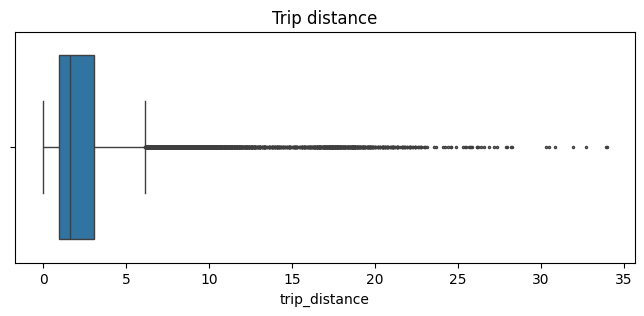

In [18]:
#Boxplot of of the trip_distance column
plt.figure(figsize=(8,3))
plt.title('Trip distance')
sns.boxplot(data=df, x=df['trip_distance'], fliersize=1.5);


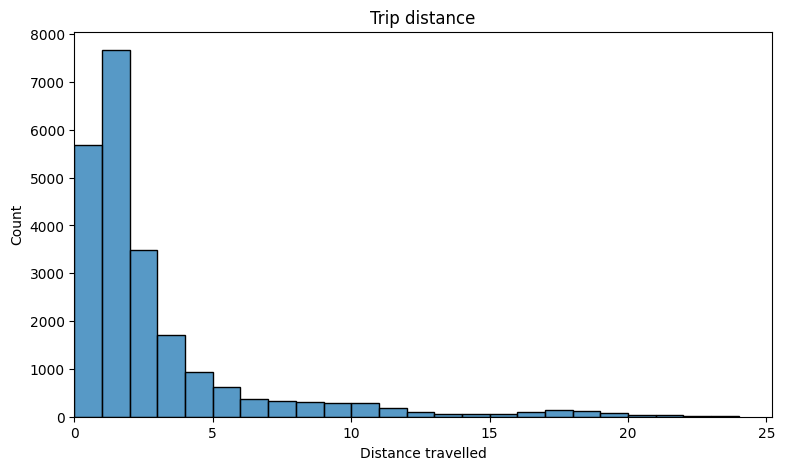

In [19]:
#Histogram of of the trip_distance column
plt.figure(figsize=(9,5))
sns.histplot(data = df, x = df['trip_distance'], bins = range(0,25,1))
plt.xlim(0)  #Set the x-axis lower limit to 0 since we know from df.describe() that there are no values under 0.
plt.xlabel('Distance travelled')
plt.title('Trip distance');

Most trips were for distances less than five miles, and there is a sharp decline in the number of trips as the distance traveled exceeds two miles.

**total amount**

df.describe() previously showed that the column total_amount had a minimum value of -120, a mean of 16.31, and the 25th percentile is 8.75, indicating that there are not many values under 0. The code belows is counts how much values are under 0.

In [20]:
count_below_zero = (df['total_amount'] < 0).sum()
count_below_zero

14

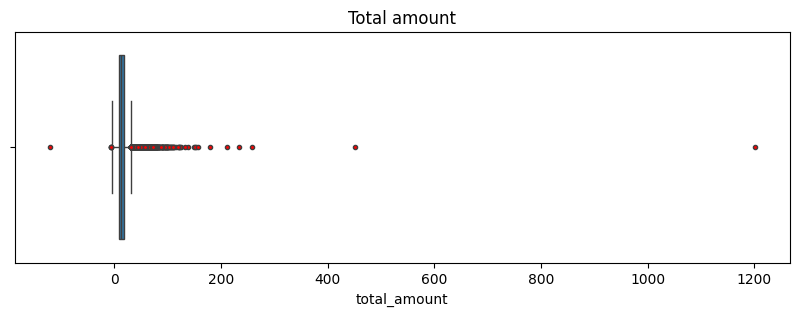

In [21]:
# Boxplot of total_amount
plt.figure(figsize=(10,3))
plt.title('Total amount')
sns.boxplot(x=df['total_amount'], flierprops=dict(markerfacecolor='red', markersize=3));

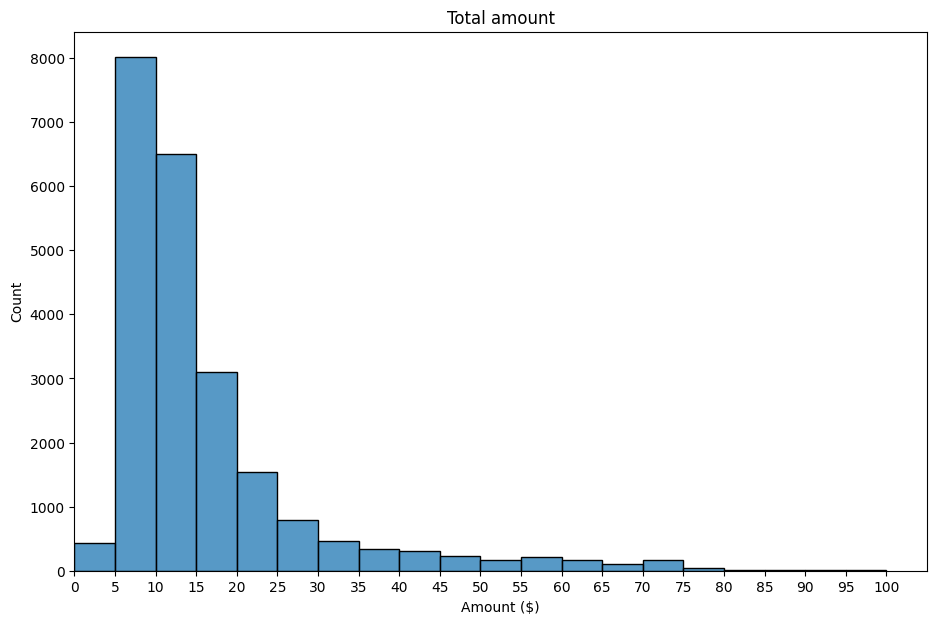

In [22]:
# Histogram of total_amount
plt.figure(figsize=(11,7))
plt.xlabel('Amount ($)');
plt.title('Total amount');
ax = sns.histplot(df['total_amount'], bins=range(0,101,5))
ax.set_xticks(range(0,101,5))
ax.set_xticklabels(range(0,101,5))
plt.xlim(0);  #The 14 values under 0 are not displayed as they are outliers.

The distribution of total trip costs is right-skewed, with the majority of costs concentrated in the $5-15 range.

**tip amount**

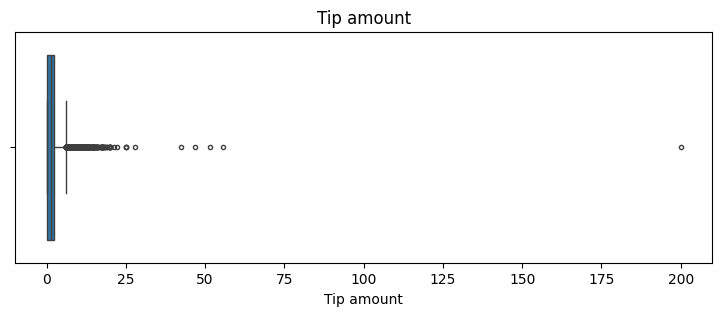

In [23]:
# Box plot of tip_amount
plt.figure(figsize=(9,3))
plt.title('Tip amount');
plt.xlabel('Tip amount');
sns.boxplot(data = df, x=df['tip_amount'], fliersize=3);

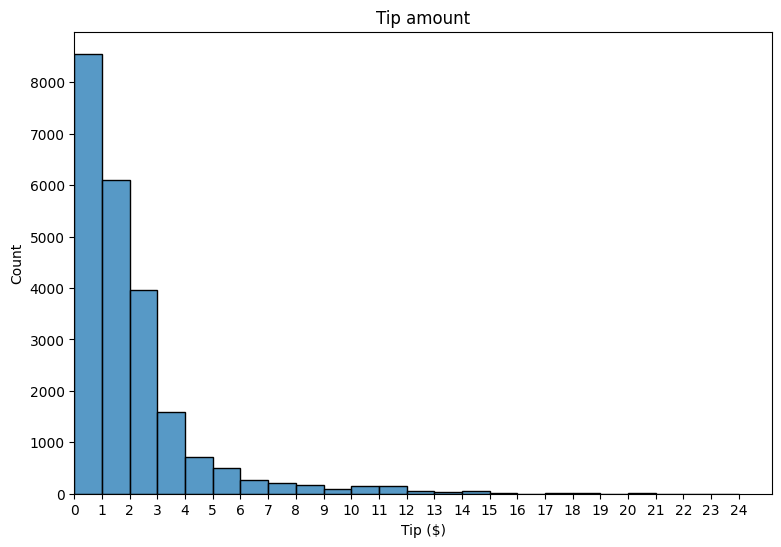

In [24]:
# Create histogram of tip_amount
plt.figure(figsize=(9,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,25,1))
ax.set_xticks(range(0,25,1))
ax.set_xticklabels(range(0,25,1))
plt.xlim(0)
plt.xlabel('Tip ($)')
plt.title('Tip amount');

Most customers tipped between 0 and 4 dollars)

**tip_amount by vendor**

The code below calculates the amount of unique values in the VendorID column.

In [25]:
df['VendorID'].nunique()

2

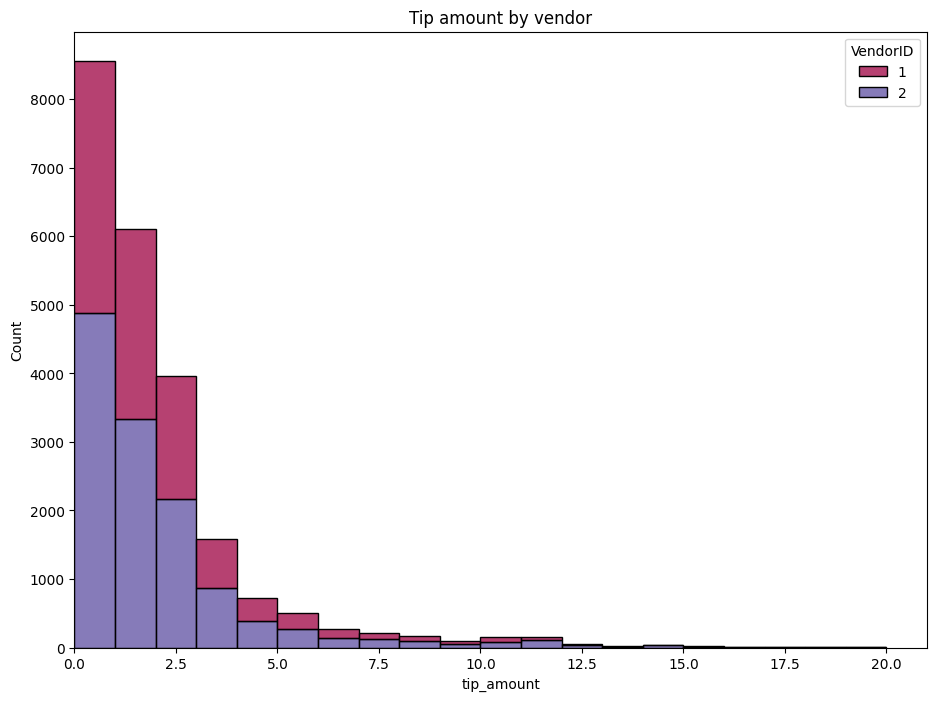

In [26]:
# Histogram of tip_amount by vendor
plt.figure(figsize=(11,8))
sns.histplot(data= df, x= 'tip_amount', bins=range(0,21,1), hue = 'VendorID', multiple = 'stack', palette='Spectral')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.xlim(0)
plt.title('Tip amount by vendor');

The majority of tips fall within the $0-3 range, indicating a right-skewed distribution for the tip amount

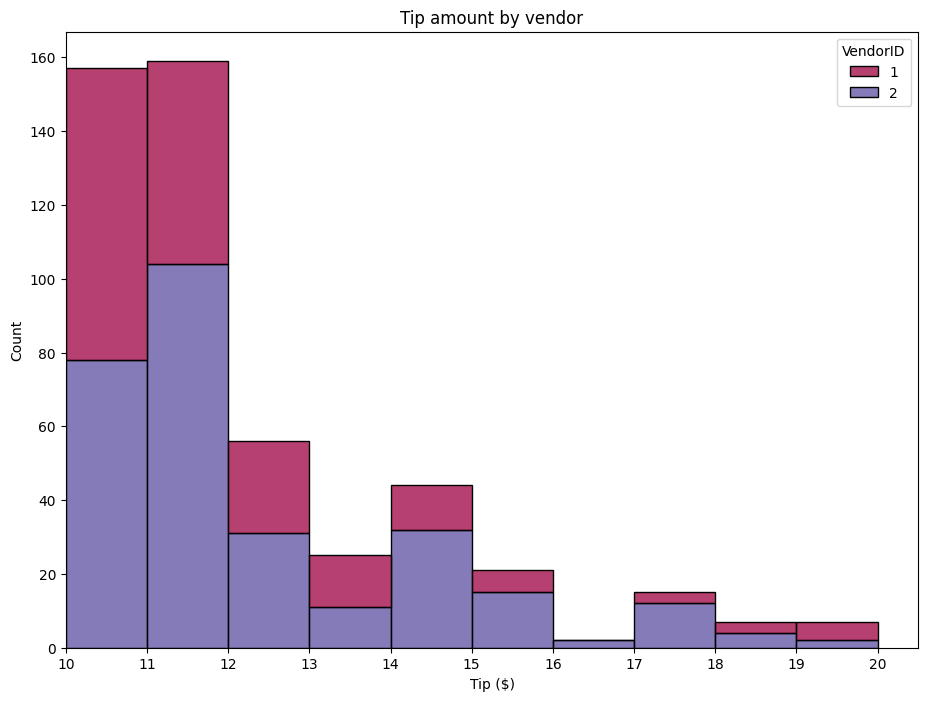

In [27]:
# Histogram of tip_amount by vendor for tips >= $10 
large_tips = df[df['tip_amount'] >= 10]
plt.figure(figsize=(11,8))
ax = sns.histplot(data=large_tips, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='Spectral')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.xlabel('Tip ($)')
plt.xlim(10)
plt.title('Tip amount by vendor');

The histogram demonstrates that most tips equal to or exceeding $10 were linked to VendorID 2, specifically VeriFone Inc.







**Mean tips by passenger count**

In [28]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

The output of the provided code indicates that the predominant pattern involves individual passengers, followed by pairs and, subsequently, groups of five.




In [32]:
# Mean tips by passenger_count
average_tips_per_passenger = df.groupby('passenger_count')['tip_amount'].mean().round(2).reset_index()
average_tips_per_passenger = average_tips_per_passenger.rename(columns={'tip_amount': 'tip_amount'})
average_tips_per_passenger

,passenger_count,tip_amount
0,0,2.14
1,1,1.85
2,2,1.86
3,3,1.72
4,4,1.53
5,5,1.87
6,6,1.72


C:\Users\julie\AppData\Local\Temp\ipykernel_16588\2708634101.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
C:\Users\julie\AppData\Local\Temp\ipykernel_16588\2708634101.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


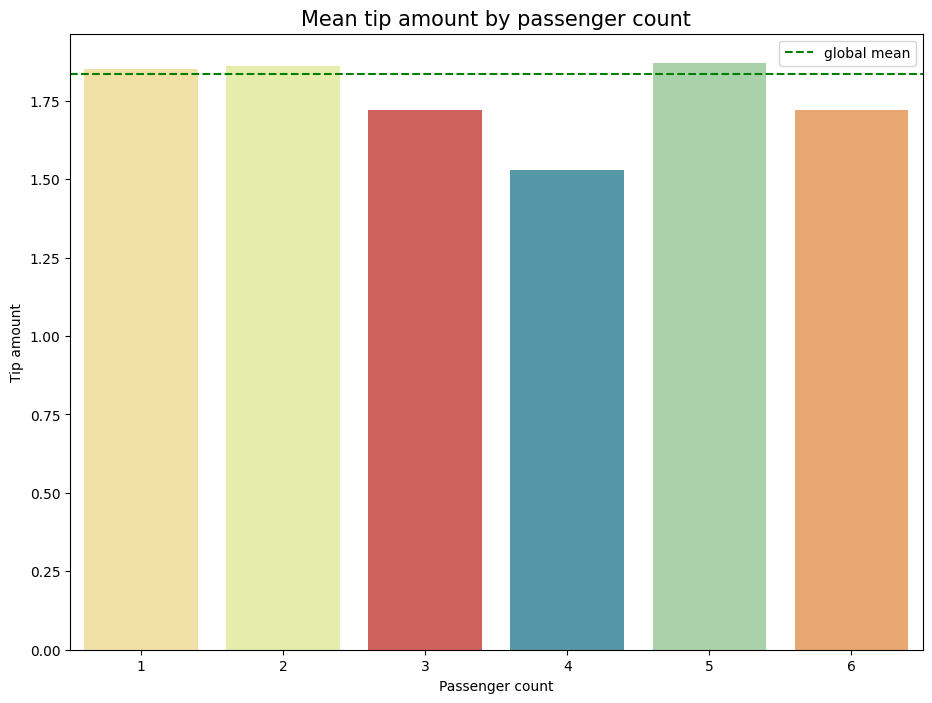

In [37]:
# Bar plot for average tips by passenger count
data = average_tips_per_passenger.tail(-1) #exclude trips when passenger_count = 0
rank = data['tip_amount'].argsort()
pal = sns.color_palette("Spectral", len(data))
plt.figure(figsize=(11,8))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='green', label='global mean')
ax.legend()
plt.xlabel('Passenger count')
plt.ylabel('Tip amount')
plt.title('Mean tip amount by passenger count', fontsize=15);

The average tip amount shows minimal variation based on passenger count. However, a noticeable decrease is observed for rides with four passengers. This drop is anticipated, given the comparatively lower frequency of rides with four passengers in the dataset, excluding those with zero passengers.

In [54]:
# New month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# New day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Ride count by month**

In [55]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [40]:
# The code below reorders the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

C:\Users\julie\AppData\Local\Temp\ipykernel_16588\1662677962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=monthly_rides.index, y=monthly_rides, palette=np.array(pal[::-1])[rank])
C:\Users\julie\AppData\Local\Temp\ipykernel_16588\1662677962.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=monthly_rides.index, y=monthly_rides, palette=np.array(pal[::-1])[rank])
C:\Users\julie\AppData\Local\Temp\ipykernel_16588\1662677962.py:4: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=monthly_rides.index, y=monthly_rides, palette=np.array(pal[::-1])[rank])
C:\Users\julie\AppData\Local\Temp\ipykernel_16588\1662677962.py:5: U

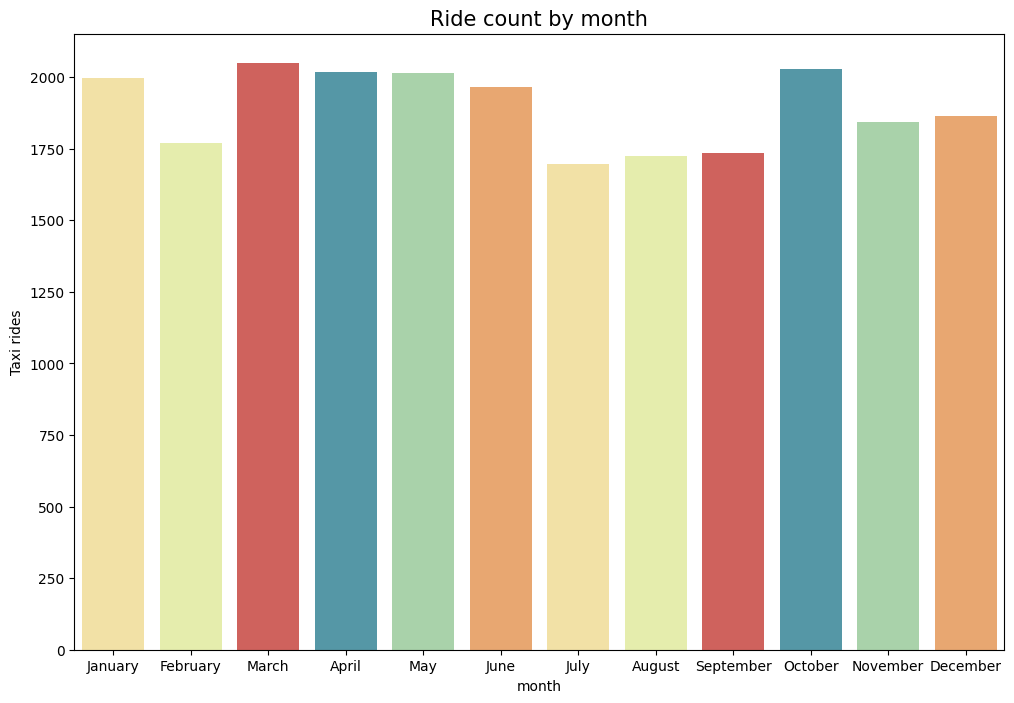

In [50]:
# Bar plot of total rides per month
plt.figure(figsize=(12,8))
pal = sns.color_palette("Spectral")
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides, palette=np.array(pal[::-1])[rank])
ax.set_xticklabels(month_order)
plt.ylabel('Taxi rides')
plt.title('Ride count by month', fontsize=15);

Monthly ride numbers exhibit a generally steady pattern, with distinct declines observed during the summer months of July, August, and September, as well as in February. The two busiest months are March and October.

**Ride count by day**

In [51]:
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

C:\Users\julie\AppData\Local\Temp\ipykernel_16588\1556500390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=daily_rides.index, y=daily_rides, palette=np.array(pal[::-1])[rank])
C:\Users\julie\AppData\Local\Temp\ipykernel_16588\1556500390.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=daily_rides.index, y=daily_rides, palette=np.array(pal[::-1])[rank])
C:\Users\julie\AppData\Local\Temp\ipykernel_16588\1556500390.py:3: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=daily_rides.index, y=daily_rides, palette=np.array(pal[::-1])[rank])
C:\Users\julie\AppData\Local\Temp\ipykernel_16588\1556500390.py:4: UserWarning: s

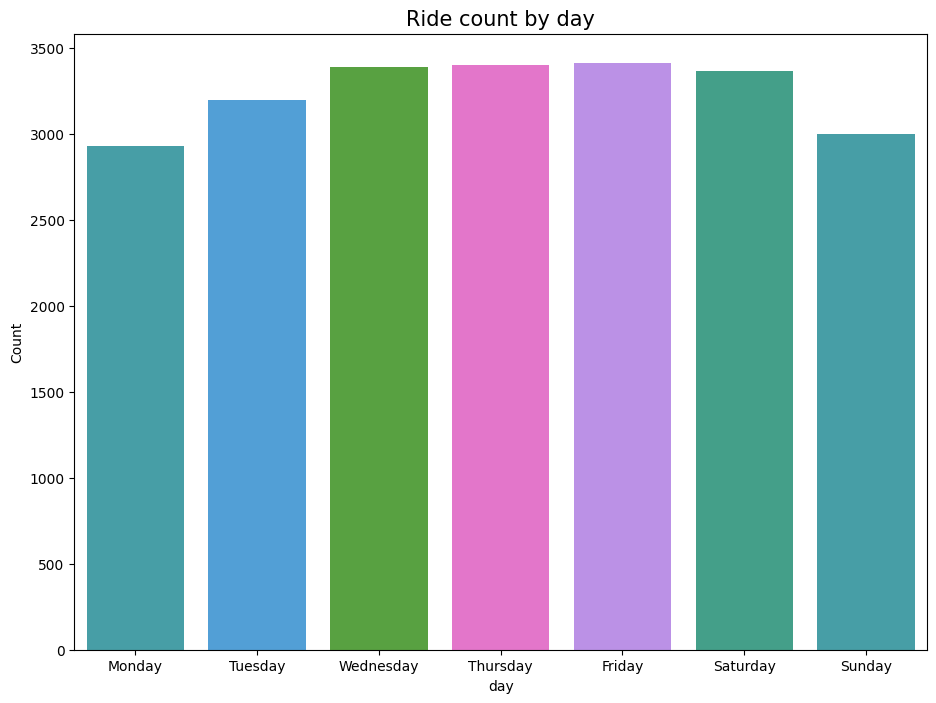

In [52]:
plt.figure(figsize=(11,8))
pal = sns.color_palette("husl", 9)
ax = sns.barplot(x=daily_rides.index, y=daily_rides, palette=np.array(pal[::-1])[rank])
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=15);

In 2017, the peak for daily rides occurred from Wednesday through Saturday, whereas Sunday and Monday experienced the lowest daily ride counts.

**Revenue by day of the week**

In [61]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')['total_amount'].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

C:\Users\julie\AppData\Local\Temp\ipykernel_16588\4005685166.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


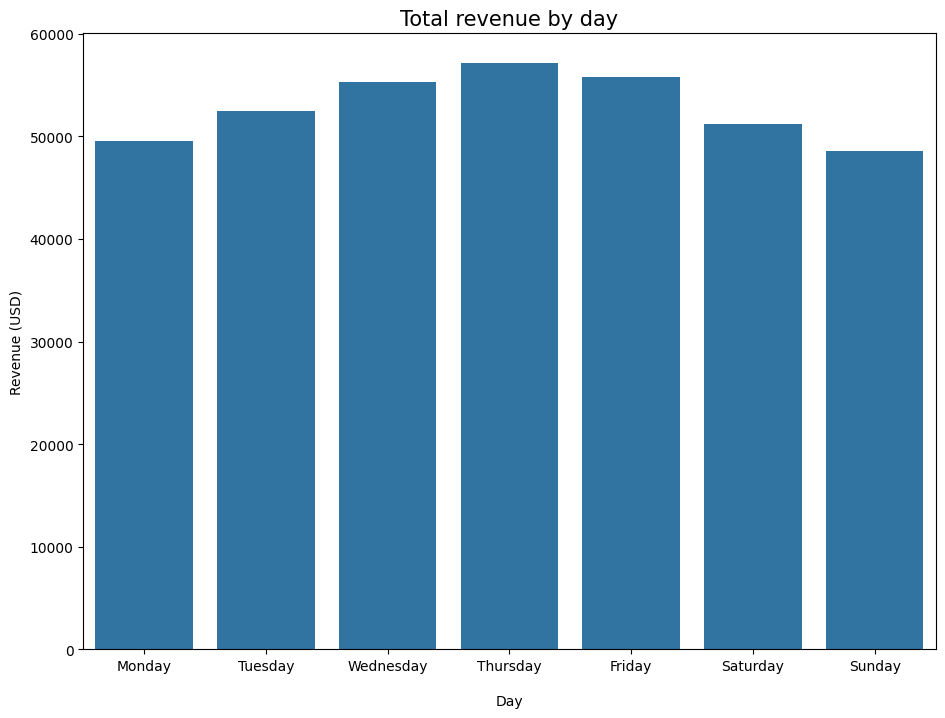

In [68]:
plt.figure(figsize=(11,8))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.xlabel('Day', labelpad=15)
plt.title('Total revenue by day', fontsize=15);

Thursday emerged with the highest gross revenue among all days, while Sunday and Monday recorded the lowest earnings. Intriguingly, despite Saturday having only 35 fewer rides than Thursday, its gross revenue was approximately $6,000 less than Thursday's, marking a notable drop of over 10%.

**Revenue by month**

In [70]:
total_amount_month = df.groupby('month')['total_amount'].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

C:\Users\julie\AppData\Local\Temp\ipykernel_16588\2210991269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_amount_month.index, y=total_amount_month, palette=np.array(pal[::-1])[rank])
C:\Users\julie\AppData\Local\Temp\ipykernel_16588\2210991269.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=total_amount_month.index, y=total_amount_month, palette=np.array(pal[::-1])[rank])
C:\Users\julie\AppData\Local\Temp\ipykernel_16588\2210991269.py:3: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=total_amount_month.index, y=total_amount_month, palette=np.array(pal[::-1])[rank])


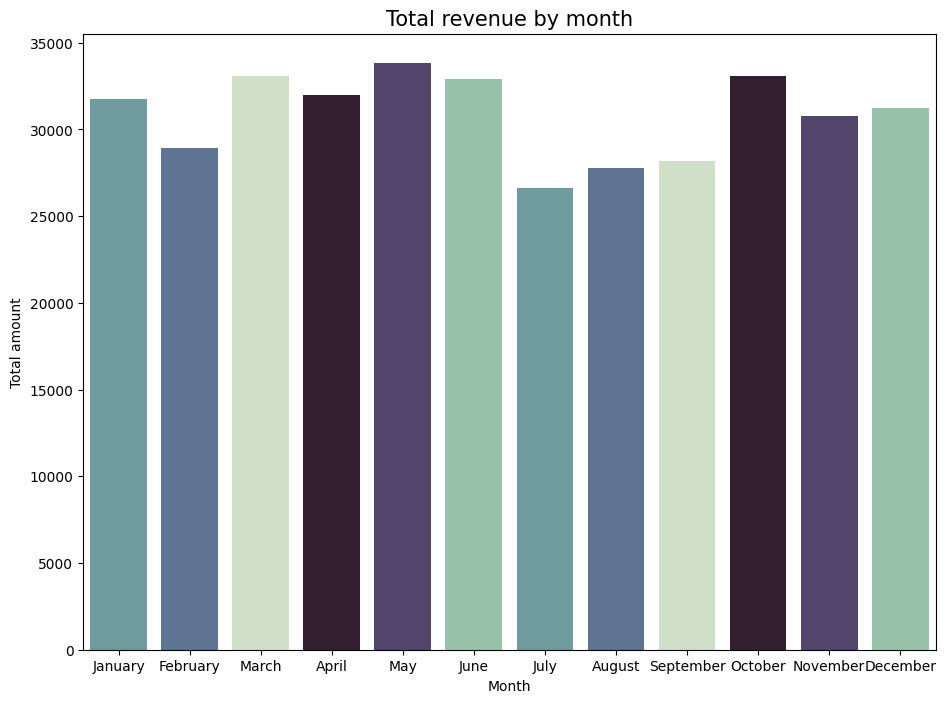

In [89]:
plt.figure(figsize=(11,8))
pal = sns.color_palette("ch:s=.785,rot=-.78")
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month, palette=np.array(pal[::-1])[rank])
plt.xlabel('Month')
plt.ylabel('Total amount')
plt.title('Total revenue by month', fontsize=15);

Monthly earnings tend to align with the pattern of monthly rides, experiencing distinct declines during the summer months of July, August, and September, as well as another dip in February.

**Mean trip distance by drop-off location**

In [119]:
df['DOLocationID'].nunique()

216

In [124]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')['trip_distance'].agg(trip_distance='mean')

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


C:\Users\julie\AppData\Local\Temp\ipykernel_16588\193301032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distance_by_dropoff.index,


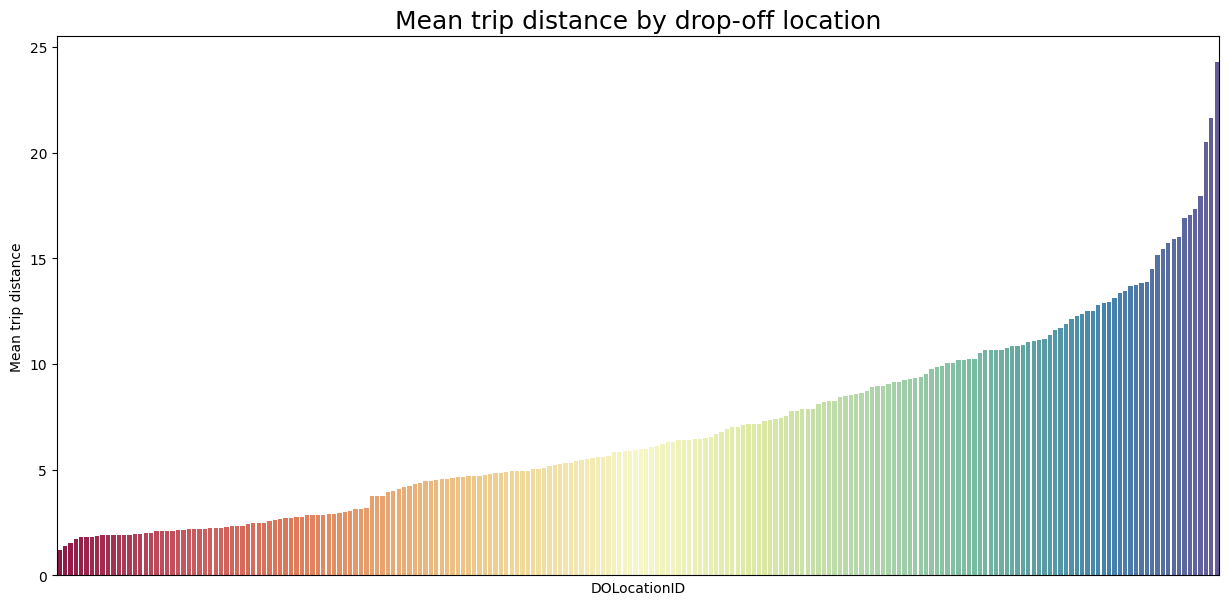

In [131]:
# Bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(15,7))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index, palette ='Spectral')
ax.set_xticks([])
ax.set_xticklabels([])
plt.ylabel('Mean trip distance')
plt.title('Mean trip distance by drop-off location', fontsize=18);

**Histogram of rides by drop-off location**

The code below checks whether the drop-off locations IDs are consecutively numbered.

In [136]:
len(set(df['DOLocationID'])) 

216

In [132]:
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

There are 49 numbers that do not represent a drop-off location. We can sort the unique drop-off location values and convert them to strings.

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

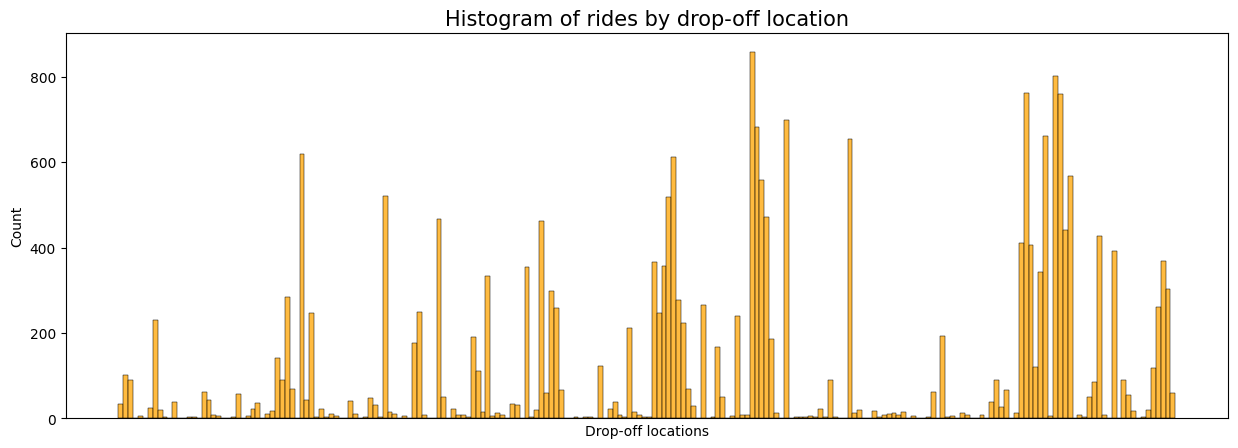

In [133]:
plt.figure(figsize=(15,5))
sorted_dropoffs = df['DOLocationID'].sort_values()
sorted_dropoffs = sorted_dropoffs.astype('str') # Convert to string
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1), color='orange')
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=15);

A significant portion of the traffic is concentrated in a few locations, while the majority of other locations experience relatively low trip volumes. It is probable that these heavily trafficked areas are situated in proximity to popular destinations.